# Theoretical Questions

Q1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

- What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
- Bagging reduces variance by training models independently on different subsets of the data in parallel, while boosting reduces bias by training models sequentially, with each new model focusing on the errors of the previous one.

##**Bagging**

**Approach:** Builds multiple independent models in parallel. Each model is trained on a random subset of the training data, created using a bootstrapping technique (sampling with replacement).

**Objective:** To reduce the variance of a model and prevent overfitting, particularly for unstable models like decision trees.
Example: Random Forest, which builds a multitude of decision trees on different bootstrapped samples of the data and then combines their predictions.

##**Boosting**

**Approach:** Builds models sequentially. Each new model is trained to correct the errors made by the previous models. It does this by giving more weight to the data points that were misclassified in the earlier stages.

**Objective:** To reduce the bias of a model and improve its accuracy.
Example: AdaBoost (Adaptive Boosting), which adaptively focuses on the misclassified examples in each iteration.

-----------------------------------------------------------------

Q2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

- The Random Forest Classifier reduces overfitting compared to a single decision tree primarily through ensemble averaging and randomization. A single decision tree, especially if allowed to grow to full depth, can easily overfit by learning the training data too perfectly, including its noise. Random Forest mitigates this by constructing multiple decision trees and aggregating their predictions.

##**Two key hyperparameters play a significant role in this process:**
**n_estimators:** This hyperparameter controls the number of decision trees in the forest. A higher number of estimators generally leads to a more stable and accurate model, as the averaging effect becomes more pronounced, further reducing variance and overfitting. However, increasing n_estimators also increases computational cost.

**max_features:** This hyperparameter determines the number of features to consider when looking for the best split at each node of a decision tree. By setting max_features to a value less than the total number of features, you enforce the "random subspace" aspect, ensuring that each tree explores different subsets of features. This decorrelates the individual trees, preventing them from making similar errors and thereby reducing the overall overfitting of the ensemble. Common values include sqrt (square root of total features) or log2.

-----------------------------------------------------------------

Q3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

- Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse models (base models) using a higher-level model called a meta-model (or meta-learner). The base models are trained on the original dataset, and their predictions become the input features for the meta-model, which then learns how to optimally combine these predictions to make a final, more accurate prediction.

##**How it differs from traditional Bagging/Boosting:**
**Model Diversity:** Stacking typically uses heterogeneous base models (e.g., a combination of Logistic Regression, Decision Trees, and Support Vector Machines), aiming to capture different aspects of the data. Bagging and Boosting, on the other hand, usually employ homogeneous weak learners (e.g., multiple decision trees in Random Forests or Gradient Boosting).

**Combination Strategy:** In Stacking, a separate meta-model learns to combine the predictions of the base models. Bagging typically combines predictions by averaging (for regression) or voting (for classification), while Boosting sequentially builds models that correct the errors of previous ones, often using weighted averaging.

**Training Process:** Stacking involves a two-stage training process: first, training the base models, and then training the meta-model on the predictions of the base models. Bagging trains base models in parallel and independently, while Boosting trains them sequentially, with each subsequent model focusing on misclassified instances from the previous one.

**Simple Example Use Case:**
Consider a customer churn prediction problem.
Base Models: Train three diverse models on your customer data:
A Logistic Regression model.
A Random Forest model.
A Gradient Boosting model.

-----------------------------------------------------------------

Q4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

- The OOB (Out-of-Bag) score in a Random Forest is an internal measure of model performance derived from data samples not used to train individual decision trees. It's useful because it provides an unbiased estimate of how the model will generalize to unseen data, allowing for model evaluation without a separate validation set. Each tree's prediction on its out-of-bag (OOB) samples is aggregated, and the final OOB score reflects the overall performance across all OOB samples.

##**How it works**

**Bootstrapping:** Random Forest builds individual decision trees by training each on a random sample of the original training data, with replacement (bootstrapping).

**Out-of-Bag samples:** On average, about one-third of the original training data is not included in each bootstrap sample. These are the "out-of-bag" (OOB) samples for that specific tree.

**Prediction and aggregation:** Each tree makes predictions on its OOB samples. The final prediction for an OOB sample is determined by aggregating the predictions from all trees that did not use that sample in their training set (e.g., by majority vote for classification or averaging for regression).

**Score calculation:** The OOB score is calculated by comparing the final aggregated predictions for all OOB samples against their actual values. This provides a single metric, such as an accuracy score, that represents the model's performance on data it has never seen during its training.

##**Why it is useful**

**Eliminates the need for a separate validation set:** The OOB score acts as a built-in validation mechanism, making the process of evaluating a model more efficient and preserving the entire training dataset for model building.
Provides an unbiased estimate: Using OOB samples to evaluate the model is unbiased because these samples were not used to train any of the decision trees used to generate the final prediction for that sample.

**Evaluates generalization:** It gives a good estimate of how the model will perform on new, unseen data, which is crucial for avoiding overfitting.
Helps in hyperparameter tuning: The OOB score can be used to tune hyperparameters, such as the number of trees in the forest. The error rate typically decreases as more trees are added, but will eventually plateau. Plotting the OOB error rate helps determine the optimal number of trees.

-----------------------------------------------------------------

Q5. Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

- AdaBoost and Gradient Boosting are both ensemble learning methods that combine multiple weak learners to create a strong learner, but they differ in their approach to handling errors, weight adjustment, and typical use cases.

##**1. How they handle errors from weak learners:**

**AdaBoost:** Focuses on misclassified samples. In each iteration, it increases the weights of incorrectly classified training instances, forcing subsequent weak learners to pay more attention to these "hard-to-learn" examples.

**Gradient Boosting:** Focuses on the residuals (errors) of the previous weak learner's predictions. Each new weak learner is trained to predict these residuals, effectively minimizing a predefined loss function through gradient descent.

##**2. Weight adjustment mechanism:**
**AdaBoost:** Adjusts the weights of the training samples. Misclassified samples receive higher weights in subsequent iterations, influencing the training of the next weak learner. It also assigns weights to the weak learners themselves based on their performance, which are used in the final weighted majority vote.

**Gradient Boosting:** Does not directly adjust sample weights. Instead, it adjusts the model itself by adding new weak learners that correct the errors of the ensemble built so far. Each new weak learner's contribution is scaled by a learning rate.

##**3. Typical use cases:**

**AdaBoost:** Primarily used for classification tasks, especially binary classification. It is effective in scenarios where simple decision stumps (shallow decision trees) are sufficient as weak learners and can provide good performance on relatively clean datasets.

**Gradient Boosting:** More versatile and can be used for both classification and regression tasks. It is well-suited for complex problems and can handle various types of data and non-linear relationships. Implementations like XGBoost, LightGBM, and CatBoost are widely used in competitive machine learning and for large datasets due to their efficiency and performance.

-----------------------------------------------------------------

Q6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

- CatBoost performs well on categorical features without requiring extensive preprocessing due to its native and sophisticated handling of these variables, which effectively mitigates common issues like data leakage and overfitting.

##**Handling of Categorical Variables in CatBoost:**

**Permutation-Driven Target Encoding:** CatBoost employs a technique called "Ordered Boosting" that uses a permutation-driven approach to convert categorical features into numerical ones. Instead of a single, fixed encoding, it generates multiple permutations of the training data. For each data point, it replaces a categorical feature's value with a statistic (e.g., the average target value) calculated only from data points that appear before it in the specific permutation. This prevents data leakage, where information from the target variable is inadvertently used to encode the categorical feature, leading to inflated performance on the training set.

**Handling High Cardinality:** CatBoost effectively handles categorical features with a large number of unique values (high cardinality). The permutation-driven target encoding scales well to these scenarios, providing a robust and less prone to overfitting solution compared to methods like one-hot encoding, which can lead to a massive increase in dimensionality.

**Automatic Feature Combination:** CatBoost can automatically combine categorical features to create new, more informative features. This can capture complex interactions between categories that might otherwise be missed, further enhancing model performance without requiring manual feature engineering.

**No Manual Encoding Required:** A key advantage is that CatBoost directly accepts categorical features as input and performs the necessary transformations internally. This significantly reduces the need for manual preprocessing steps like one-hot encoding or label encoding, saving time and effort for the user.

-----------------------------------------------------------------

# Practical Questions

In [ ]:
'''
Q7. : KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions
'''
'''
Answer:-7
'''
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Part 3: Train Unscaled KNN Classifier ---
print("--- Unscaled KNN Classifier (K=5) ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate Unscaled
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy (Unscaled): {accuracy_unscaled:.4f}")
print("\nClassification Report (Unscaled):")
print(classification_report(y_test, y_pred_unscaled, target_names=target_names))

# --- Part 4: Apply StandardScaler and Retrain KNN ---
print("\n--- Scaled KNN Classifier (K=5) ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate Scaled
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (Scaled): {accuracy_scaled:.4f}")
print("\nClassification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled, target_names=target_names))

# --- Part 5: Use GridSearchCV to find the best K and distance metric ---
print("\n--- GridSearchCV for Optimized KNN ---")
# Define the parameters grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier object
knn_grid = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train) # Use scaled data for GridSearchCV as scaling generally improves KNN performance

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# --- Part 6: Train the optimized KNN and compare results ---
print("\n--- Optimized KNN Classifier ---")
# Get the best model from GridSearchCV
knn_optimized = grid_search.best_estimator_
knn_optimized.fit(X_train_scaled, y_train) # Retrain with best params on the full scaled training set

y_pred_optimized = knn_optimized.predict(X_test_scaled)

# Evaluate Optimized
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy (Optimized): {accuracy_optimized:.4f}")
print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized, target_names=target_names))

# Comparison Summary
print("\n--- Comparison of Results ---")
print(f"Accuracy (Unscaled, K=5): {accuracy_unscaled:.4f}")
print(f"Accuracy (Scaled, K=5): {accuracy_scaled:.4f}")
print(f"Accuracy (Optimized, Best K & Metric): {accuracy_optimized:.4f}")

--- Unscaled KNN Classifier (K=5) ---
Accuracy (Unscaled): 0.7407

Classification Report (Unscaled):
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


--- Scaled KNN Classifier (K=5) ---
Accuracy (Scaled): 0.9630

Classification Report (Scaled):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- GridSearchCV for Optimized KNN ---
B

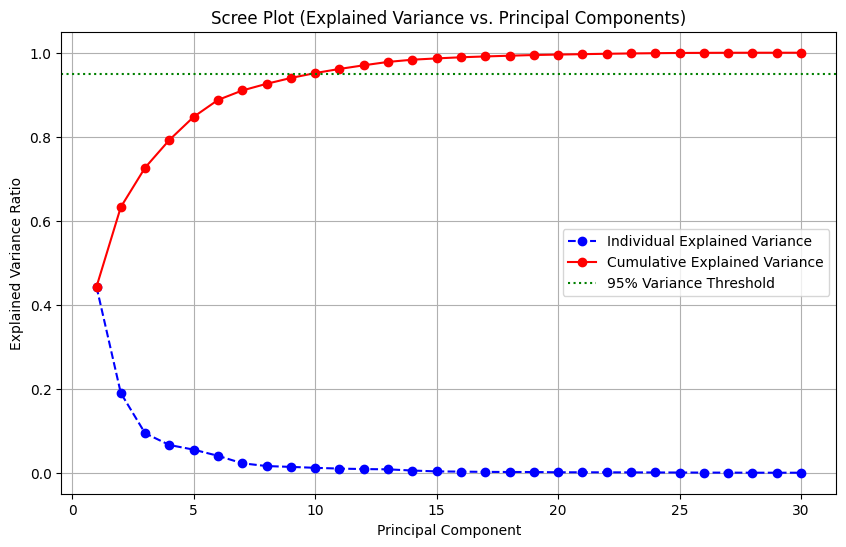

Original number of features: 30
Number of features after retaining 95% variance: 10

Accuracy on original data: 0.9591
Accuracy on PCA (95% variance) data: 0.9649


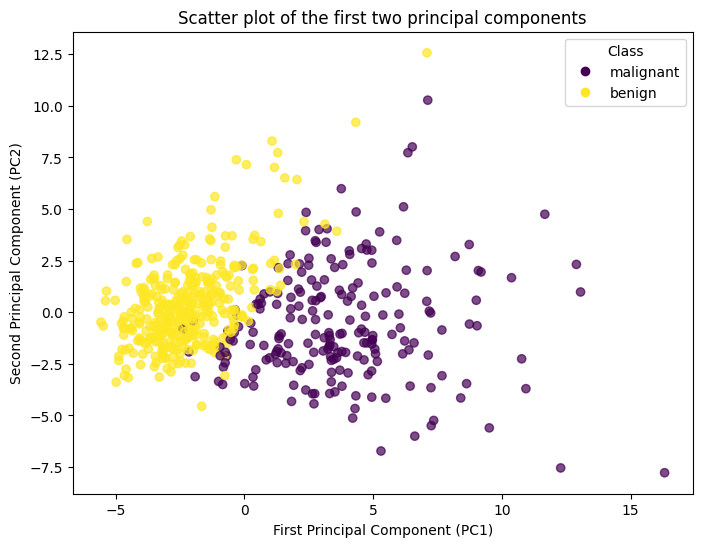

In [3]:
'''
Q8. PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).
'''
'''
Answer:-8
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Standardize the data (PCA is sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot the scree plot
pca_full = PCA(n_components=None) # Apply PCA with all components to get full variance info
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the scree plot (explained variance ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='blue', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance vs. Principal Components)')
plt.axhline(y=0.95, color='green', linestyle=':', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95) # Retain components that explain 95% variance
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after retaining 95% variance: {X_pca_95.shape[1]}")

# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy

# Split data into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)

# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nAccuracy on original data: {accuracy_orig:.4f}")
print(f"Accuracy on PCA (95% variance) data: {accuracy_pca:.4f}")

# 5. Visualize the first two principal components
# Re-apply PCA to get exactly two components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
# Color points by class label (malignant/benign)
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Scatter plot of the first two principal components')
# Add legend
# Create legend handles manually
handles = [plt.Line2D([], [], marker='o', color=scatter.cmap(scatter.norm(class_value)), linestyle='', label=target_names[class_value])
           for class_value in np.unique(y)]
plt.legend(handles=handles, title="Class")
plt.show()

MSE with Euclidean distance (K=5): 4600.79
MSE with Manhattan distance (K=5): 5425.15


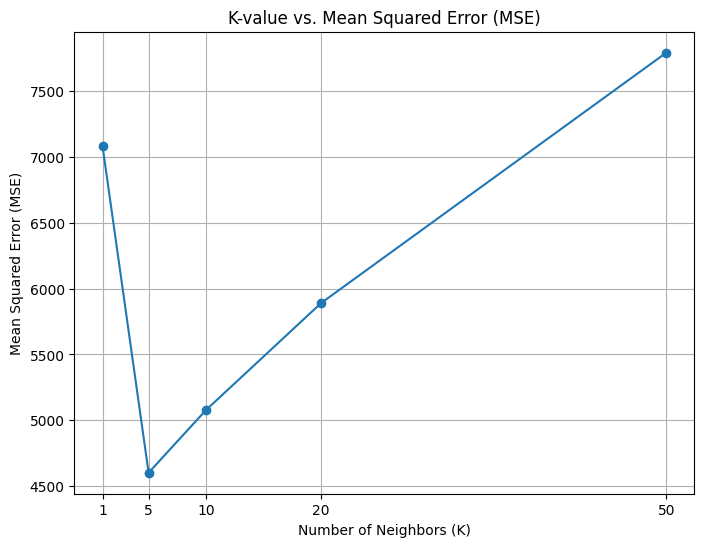

In [ ]:
'''
Q9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
'''
'''
Answer:-9
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train KNN regressors with different distance metrics (K=5)
# a. Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both
print(f"MSE with Euclidean distance (K=5): {mse_euclidean:.2f}")
print(f"MSE with Manhattan distance (K=5): {mse_manhattan:.2f}")

# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs. MSE to analyze bias-variance tradeoff
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.title('K-value vs. Mean Squared Error (MSE)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

Please ensure 'pima-indians-diabetes.csv' is in the same directory.
Using a dummy dataset for demonstration.

--- KNN Performance Comparison ---
Brute-force:
  Training Time: 0.0011 seconds
  Accuracy: 0.3333
KD-Tree:
  Training Time: 0.0014 seconds
  Accuracy: 0.3333
Ball Tree:
  Training Time: 0.0041 seconds
  Accuracy: 0.3333

Best performing method: Brute-force with an accuracy of 0.3333


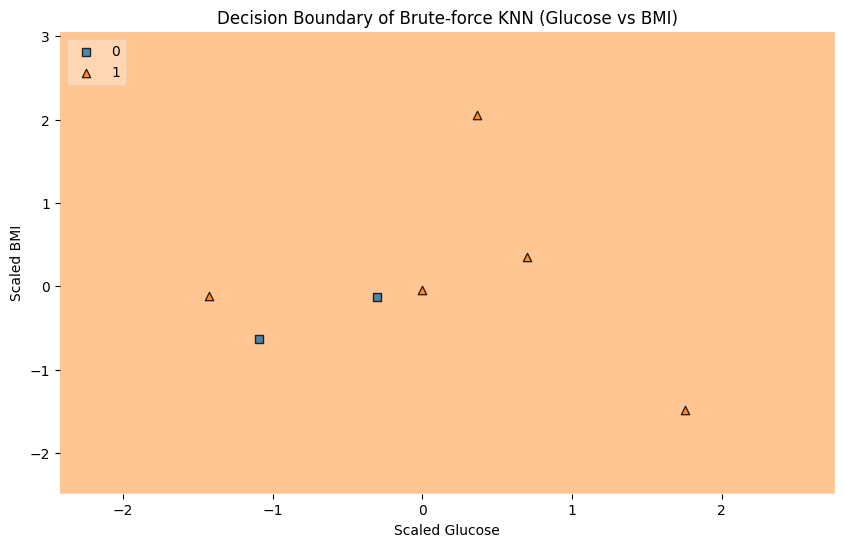

In [2]:
'''
Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

'''
'''
Answer:-10
'''
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions # For plotting decision boundaries
from sklearn.preprocessing import StandardScaler

# 1. Load the Pima Indians Diabetes dataset
# The dataset is often found online, or can be loaded from a local file.
# For demonstration, we'll assume a CSV file named 'pima-indians-diabetes.csv'
# and replace 0s in certain columns with NaN to represent missing values.
try:
    # Skip the header row by setting header=None and using skiprows=1
    df = pd.read_csv('pima-indians-diabetes.csv', header=None, skiprows=1,
                     names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
except FileNotFoundError:
    print("Please ensure 'pima-indians-diabetes.csv' is in the same directory.")
    # As a fallback, create a dummy dataframe for demonstration purposes if the file is not found
    data = {
        'Pregnancies': [6, 1, 8, 1, 0, 5, 3, 10, 2, 8],
        'Glucose': [148, 85, 183, 89, 137, 116, 78, 115, 197, 125],
        'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96],
        'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0],
        'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 0, 30.5, 0],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.173, 0.173, 0.232], # Corrected typo in dummy data
        'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54],
        'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
    }
    df = pd.DataFrame(data)
    print("Using a dummy dataset for demonstration.")

# Replace 0s with NaN in relevant columns as they represent missing values in this dataset
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Use KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# Scale the data for better KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train KNN using Brute-force, KD-Tree, and Ball Tree
knn_methods = {
    'Brute-force': KNeighborsClassifier(n_neighbors=5, algorithm='brute'),
    'KD-Tree': KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Ball Tree': KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
}

training_times = {}
accuracies = {}

for name, knn_model in knn_methods.items():
    start_time = time.time()
    knn_model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time

    y_pred = knn_model.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)

# 4. Compare their training time and accuracy
print("\n--- KNN Performance Comparison ---")
for name in knn_methods.keys():
    print(f"{name}:")
    print(f"  Training Time: {training_times[name]:.4f} seconds")
    print(f"  Accuracy: {accuracies[name]:.4f}")

# Determine the best-performing method based on accuracy (and potentially time)
best_method_name = max(accuracies, key=accuracies.get)
print(f"\nBest performing method: {best_method_name} with an accuracy of {accuracies[best_method_name]:.4f}")

# 5. Plot the decision boundary for the best-performing method (use 2 most important features)
# For simplicity, we'll use 'Glucose' and 'BMI' as they are often important in diabetes prediction.
# We need to re-train the best model with only these two features for plotting.
features_for_plotting = ['Glucose', 'BMI']
X_plot = X_imputed_df[features_for_plotting]
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size=0.3, random_state=42)

scaler_plot = StandardScaler()
X_train_plot_scaled = scaler_plot.fit_transform(X_train_plot)

# Correct the algorithm name for the best performing method
algorithm_for_plotting = best_method_name.lower().replace('-', '_')
if algorithm_for_plotting == 'brute_force':
  algorithm_for_plotting = 'brute'

best_knn_model_plot = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm_for_plotting)
best_knn_model_plot.fit(X_train_plot_scaled, y_train_plot)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_plot_scaled, y_train_plot.values, clf=best_knn_model_plot, legend=2)
plt.xlabel('Scaled Glucose')
plt.ylabel('Scaled BMI')
plt.title(f'Decision Boundary of {best_method_name} KNN (Glucose vs BMI)')
plt.show()